In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import pandas as pd

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image_dataset_from_directory
import tensorflow.compat.v2 as tf
import tensorflow_hub as hub
from tensorflow.keras.layers.experimental import preprocessing


In [ ]:
train_dataset = image_dataset_from_directory(r"/content/drive/MyDrive/Result", 
                validation_split = 0.2,
                subset= "training",
                seed = 123,
                labels = 'inferred',
                label_mode = 'int',
                image_size = [300, 225],
                interpolation = 'nearest',
                batch_size = 64,
                shuffle=True,
)
val_dataset = train_dataset = image_dataset_from_directory(r"/content/drive/MyDrive/Result", 
                validation_split = 0.2,
                subset= "validation",
                seed = 123,
                labels = 'inferred',
                label_mode = 'int',
                image_size = [300, 225],
                interpolation = 'nearest',
                batch_size = 64,
                shuffle=True,
)


Found 4207 files belonging to 2079 classes.
Using 3366 files for training.
Found 4207 files belonging to 2079 classes.
Using 841 files for validation.


In [ ]:
class_names = train_dataset.class_names

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_dataset = val_dataset.cache().prefetch(buffer_size=AUTOTUNE)

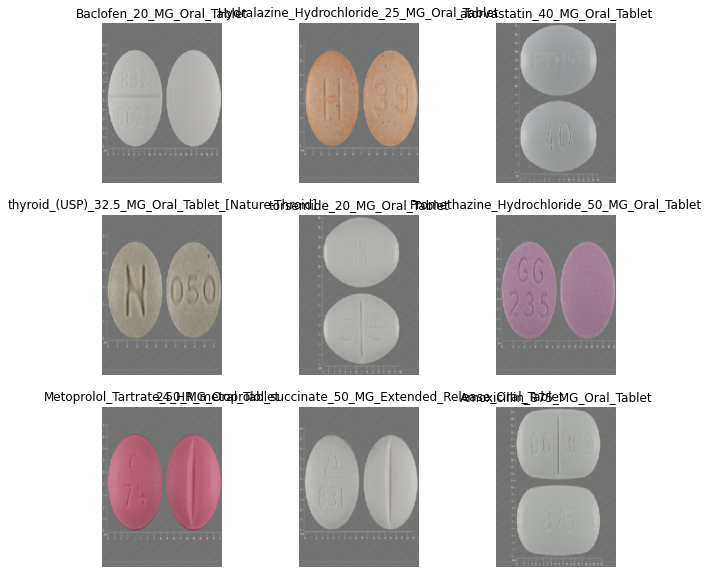

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
hub_layer = hub.KerasLayer("https://tfhub.dev/tensorflow/efficientnet/b7/classification/1") 
hub_layer.trainable = False

In [ ]:
num_classes = len(class_names)
model = keras.Sequential([
        layers.Rescaling(1./255, input_shape=(300, 225, 3)),
        layers.Resizing(224, 224),
        hub_layer,
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes)
        ])
model.build([None, 224, 224, 3])

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'],
)

In [ ]:
epochs= 
history = model.fit(
  train_dataset,
  validation_data=val_dataset,
  epochs=epochs
)


Epoch 1/50
 7/14 [==============>...............] - ETA: 4:27 - loss: 7.6394 - accuracy: 0.0000e+00

KeyboardInterrupt: ignored

In [ ]:
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['accuracy', 'val_accuracy']].plot();